# Exploring a demonstration

This notebook shows several standard ways to interact with the demonstrations stored into the exp/run directories. 

In [1]:
import sys
sys.path.append("..")
from exp_run_config import Config
Config.PROJECTNAME = "BerryPicker"

import matplotlib.pyplot as plt
import random
import pprint
import torch

from demonstration import Demonstration, list_demos, select_demo, get_simple_transform
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
experiment = "demonstration"
# run = "freeform"
run = "random-both-cameras"
exp = Config().get_experiment(experiment, run)

***ExpRun**: Loading pointer config file:
	/Users/lboloni/.config/BerryPicker/mainsettings.yaml
***ExpRun**: Loading machine-specific config file:
	/Users/lboloni/Google Drive/My Drive/LotziStudy/Code/PackageTracking/BerryPicker/settings/settings-szenes.yaml
***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/demonstration/_defaults_demonstration.yaml was empty, ok.
***ExpRun**: Configuration for exp/run: demonstration/random-both-cameras successfully loaded


### Read out all the demonstrations from a run

In [3]:
# read out all the demonstrations from a run
demos = list_demos(exp)
pprint.pprint(demos)

['2025_03_08__14_29_07',
 '2025_03_08__14_26_12',
 '2025_03_08__14_27_55',
 '2025_03_08__14_21_28',
 '2025_03_08__14_19_12',
 '2025_03_08__14_15_53',
 '2025_03_08__14_32_20',
 '2025_03_08__14_24_52',
 '2025_03_08__14_23_19',
 '2025_03_08__14_16_57']


In [4]:
#demoname = select_demo(exp, force_name="testing")
demoname = select_demo(exp)
print(f"You selected demo with name: {demoname}")

A pop up dialog will appear now. Enter the number of demonstration.
	0: 2025_03_08__14_29_07
	1: 2025_03_08__14_26_12
	2: 2025_03_08__14_27_55
	3: 2025_03_08__14_21_28
	4: 2025_03_08__14_19_12
	5: 2025_03_08__14_15_53
	6: 2025_03_08__14_32_20
	7: 2025_03_08__14_24_52
	8: 2025_03_08__14_23_19
	9: 2025_03_08__14_16_57
You chose demonstration: 2025_03_08__14_19_12
You selected demo with name: 2025_03_08__14_19_12


###  Read out all the pictures in the demonstration

In [5]:
demo = Demonstration(exp, demoname)
print(demo)


{'actions': [{'rc-angle-target': {'0': 91.5,
                                  '1': 113.0,
                                  '2': 97.0,
                                  '3': 72.0,
                                  '4': 74.5},
              'rc-position-target': {'distance': 5.1,
                                     'gripper': 95.0,
                                     'heading': 1.5,
                                     'height': 4.9,
                                     'wrist_angle': -46.5,
                                     'wrist_rotation': 74.5},
              'rc-pulse-target': {'0': 1556.0,
                                  '1': 1715.0,
                                  '2': 1577.0,
                                  '3': 1300.0,
                                  '4': 1327.0,
                                  '5': 1075.0},
              'time': 0},
             {'rc-angle-target': {'0': 91.5,
                                  '1': 113.0,
                                  '2': 

Cameras found: ['dev2', 'dev3']
There are 446 steps in this demonstration
Random image, read as anything
Chosen camera dev2 image 413


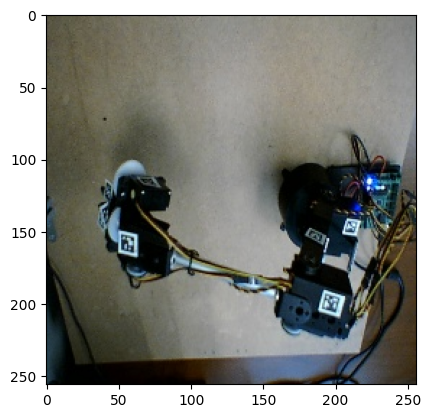

In [6]:
print(f"Cameras found: {demo.metadata['cameras']}")
print(f"There are {demo.metadata['maxsteps']} steps in this demonstration")

# if demo.metadata["stored_as_images"]:
    # pick and show a random image from a random camera
print("Random image, read as anything")
cam = random.choice(demo.metadata["cameras"])
imgno = random.randint(0, demo.metadata["maxsteps"])
print(f"Chosen camera {cam} image {imgno}")

transform = get_simple_transform()

sensor_readings, image = demo.get_image(imgno, camera=cam, device=device, transform=transform)
fig, ax = plt.subplots()
ax.imshow(image)


### Compare the same image from the video and the image

In [7]:
if demo.metadata["stored_as_images"] and demo.metadata["stored_as_video"]:
    imgno = random.randint(0, demo.metadata["maxsteps"])
    print(f"Image number: {imgno}")
    vid_tensor, vid_image = demo.get_image_from_video(imgno, camera=cam, device=device, transform=transform)
    img_tensor, img_image = demo.get_image(imgno+1, camera=cam, device=device, transform=transform)
    fig, [ax1, ax2] = plt.subplots(1,2)
    ax1.imshow(img_image)
    ax1.set_title("Image from image file")
    ax2.imshow(vid_image)
    ax2.set_title("Image from video file")
    print("Difference between image and video tensors")
    print(vid_tensor - img_tensor)
else:
    print("This demo does not have both image and video files")


This demo does not have both image and video files


### Example of how to generate video files from the image files
Note that this will delete the image files.

In [ ]:
# demo.move_to_video(delete_img_files=True)
# demo.move_to_video(delete_img_files=False)

***Demonstration***: moving to video started
*** Demonstration***: moving to video done


In [9]:
### How to access the actions
imgno = random.randint(0, demo.metadata["maxsteps"])
pprint.pprint(demo.actions[imgno])
a = demo.get_action(imgno)
print(f"Action: {a}")

{'rc-angle-target': {'0': 103.5,
                     '1': 102.0,
                     '2': 109.0,
                     '3': 71.0,
                     '4': 79.05047652452417},
 'rc-position-target': {'distance': 5.372125102288523,
                        'gripper': 51.6088846813947,
                        'heading': 13.5,
                        'height': 2.407258540960978,
                        'wrist_angle': -69.73755185445134,
                        'wrist_rotation': 79.05047652452417},
 'rc-pulse-target': {'0': 1690.0,
                     '1': 1593.0,
                     '2': 1711.0,
                     '3': 1288.0,
                     '4': 1378.0,
                     '5': 1725.8667297790794},
 'time': 43}
Action: [5.372125102288523, 51.6088846813947, 13.5, 2.407258540960978, -69.73755185445134, 79.05047652452417]
